# Distributed Data

## JuliaDB can distribute data across multiple processes when available

In [1]:
addprocs(2)

2-element Array{Int64,1}:
 2
 3

In [2]:
using JuliaDB

dt = loadtable("stocksample", filenamecol = :Ticker, indexcols = [:Ticker, :Date])

Distributed Table with 56023 rows in 2 chunks:
Columns:
#  colname  type
───────────────────
1  Ticker   String
2  Date     Date
3  Open     Float64
4  High     Float64
5  Low      Float64
6  Close    Float64
7  Volume   Int64
8  OpenInt  Int64

### Notable difference 1: No `getindex`

In [3]:
dt[1]

LoadError: [91mMethodError: no method matching getindex(::JuliaDB.DNextTable{NamedTuples._NT_Ticker_Date_Open_High_Low_Close_Volume_OpenInt{String,Date,Float64,Float64,Float64,Float64,Int64,Int64},NamedTuples._NT_Ticker_Date{String,Date}}, ::Int64)[39m

In [4]:
using StatPlots
gr(fmt = :png)

Plots.GRBackend()

### Notable difference 2: Not iterable

In [5]:
@df dt plot(:Date, :Close, group = :Ticker)

LoadError: [91mOnly iterable tables are supported[39m

# Bring Distributed Table Into Master Process

In [6]:
t = collect(dt)

Table with 56023 rows, 8 columns:
Columns:
#  colname  type
───────────────────
1  Ticker   String
2  Date     Date
3  Open     Float64
4  High     Float64
5  Low      Float64
6  Close    Float64
7  Volume   Int64
8  OpenInt  Int64


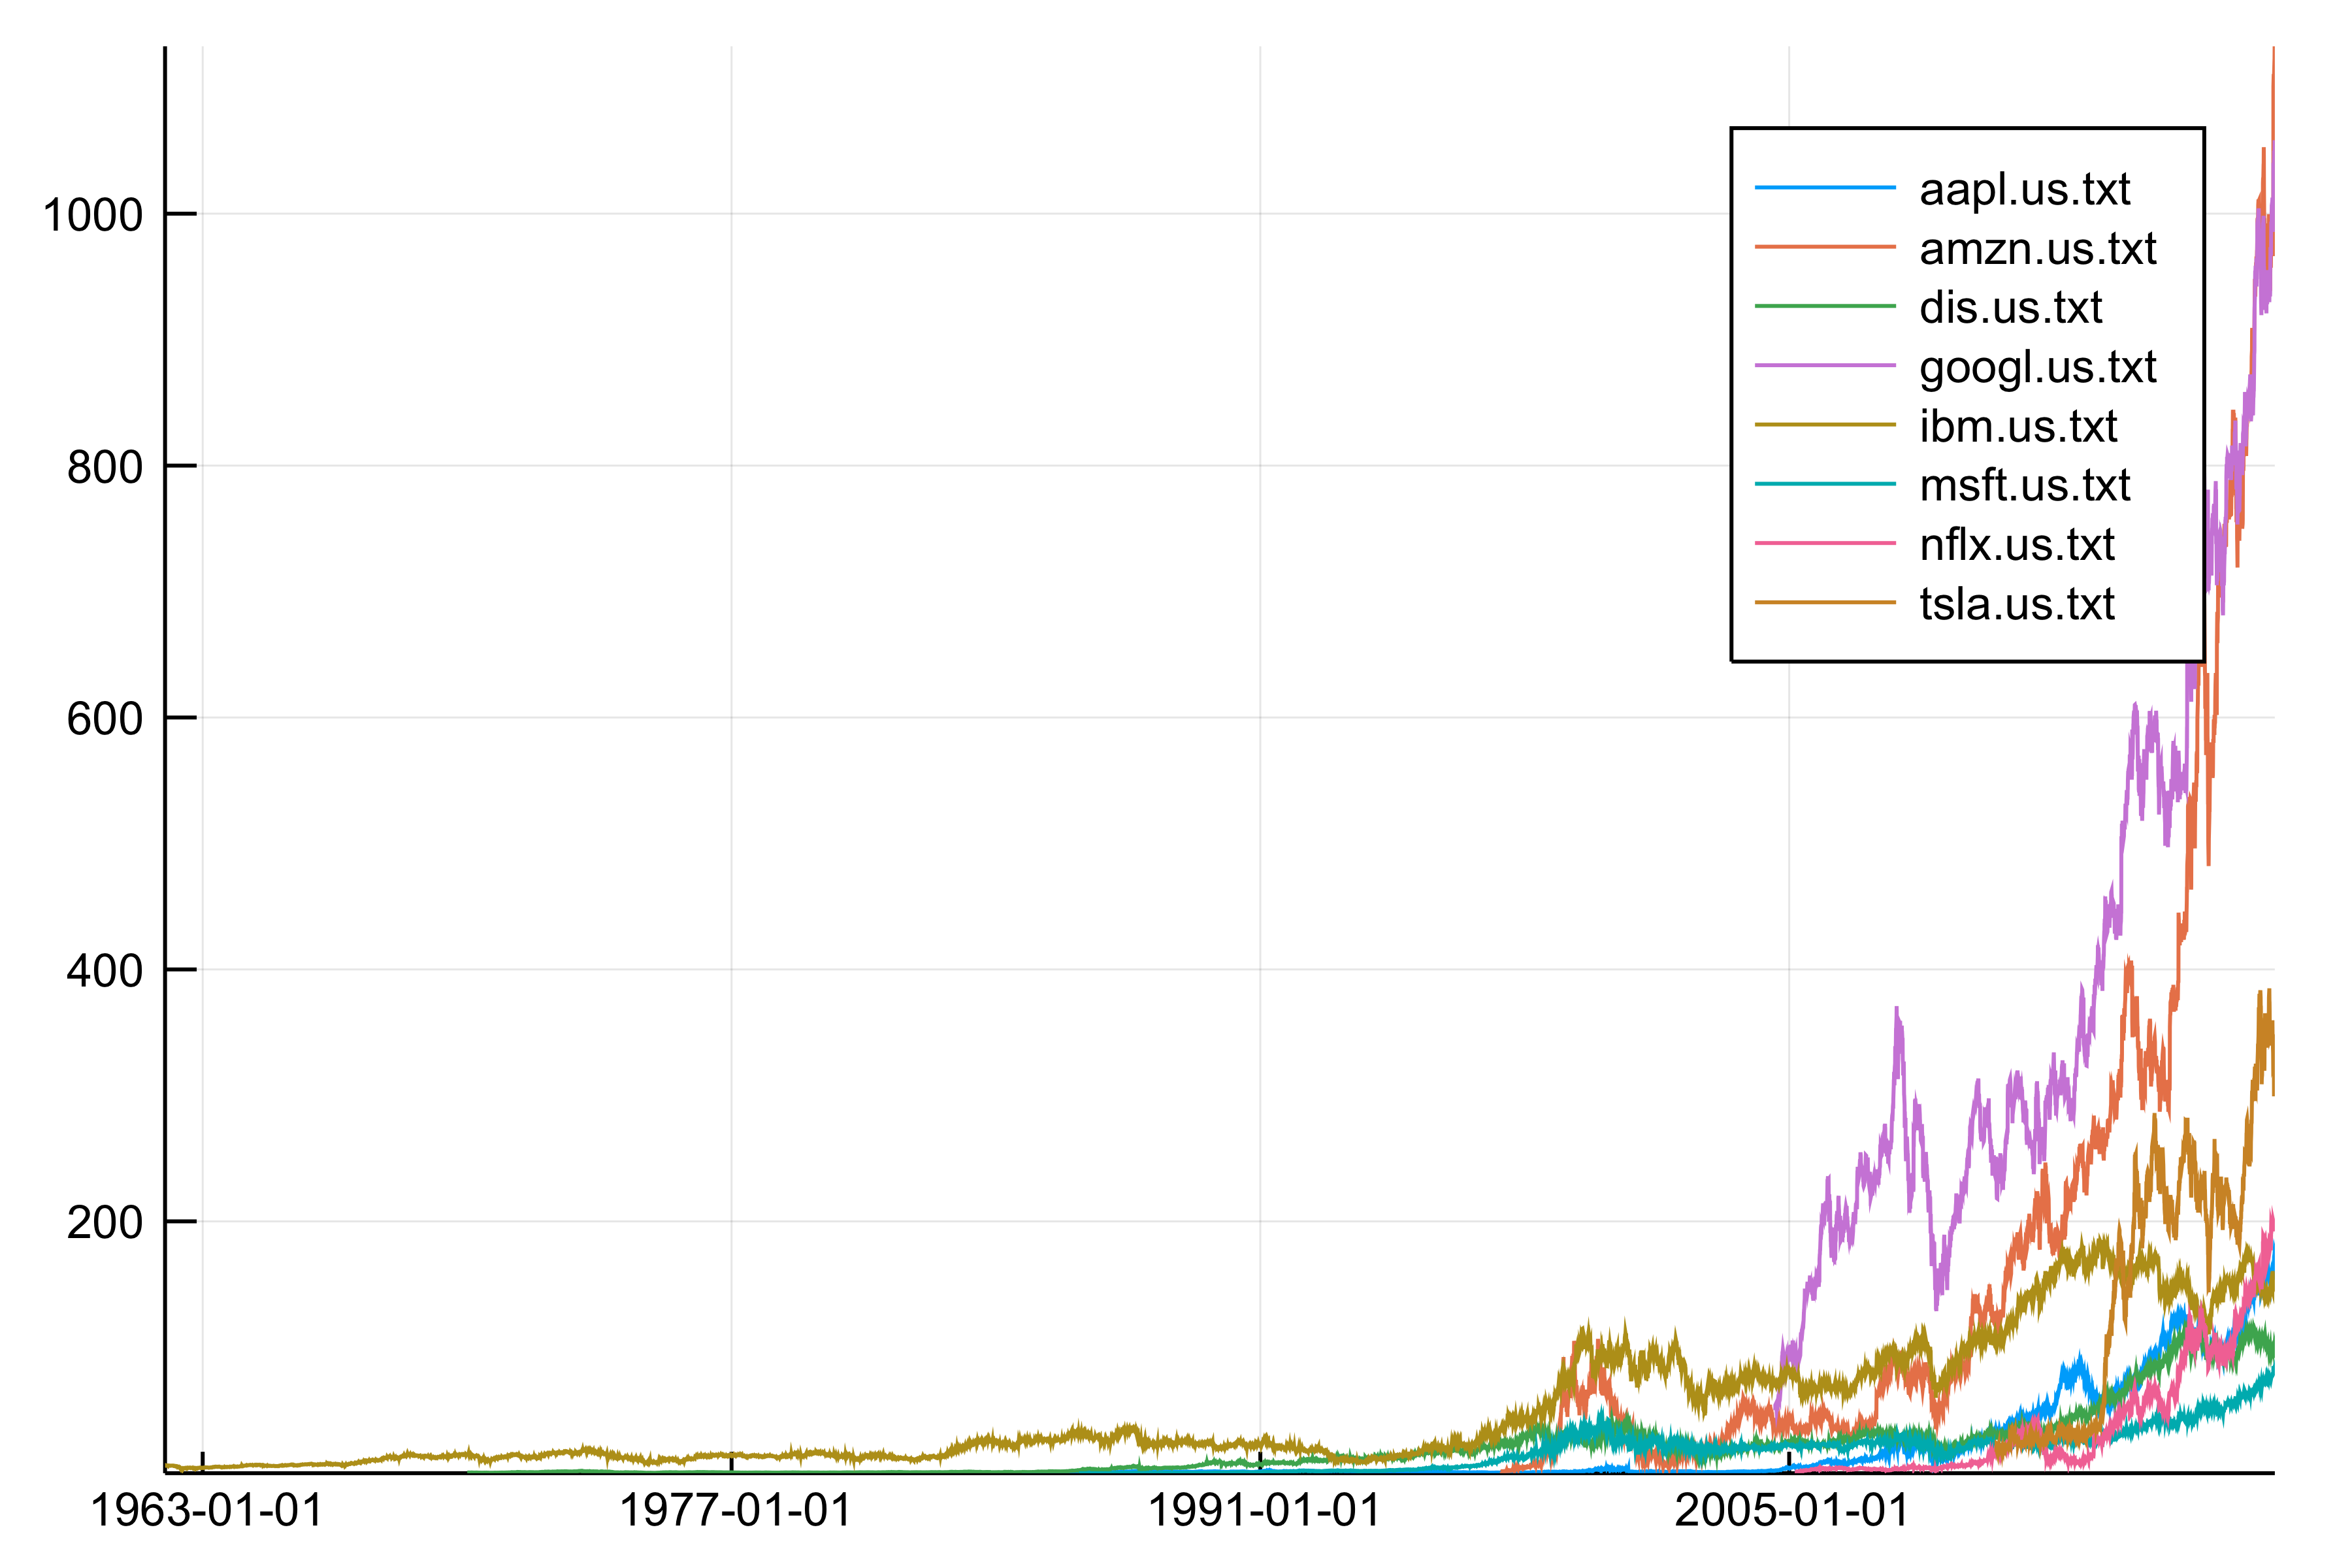

In [7]:
@df t plot(:Date, :Close, group = :Ticker)

# Everything works as expected

- 
- Functions that returned a Table now return a Distributed Table

In [8]:
groupreduce(+, dt, :Ticker; select = :Close)

Distributed Table with 8 rows in 2 chunks:
Ticker          +
─────────────────────────
"aapl.us.txt"   1.86358e5
"amzn.us.txt"   9.36657e5
"dis.us.txt"    2.4894e5
"googl.us.txt"  1.29939e6
"ibm.us.txt"    6.82623e5
"msft.us.txt"   1.51555e5
"nflx.us.txt"   1.26508e5
"tsla.us.txt"   2.7936e5

In [9]:
select(dt, :Close)

LoadError: [91mMethodError: Dagger.distribute(::Dagger.DArray{String,1,JuliaDB.##59#62}, ::Dagger.DomainBlocks{1}) is ambiguous. Candidates:
  distribute(source, rowgroups::AbstractArray) in IterableTables at /Users/joshday/.julia/v0.6/IterableTables/src/integrations/juliadb.jl:19
  distribute(x::AbstractArray, dist) in Dagger at /Users/joshday/.julia/v0.6/Dagger/src/array/darray.jl:361
Possible fix, define
  distribute(::AbstractArray, ::AbstractArray)[39m

# Plotting Big Data

If you trying to distribute your data, it's probably big.

- `partitionplot` incrementally builds summaries of the data. 
- The idea is that when data is huge it doesn't make sense to plot every point. 
- `partitionplot` relies on fixed-size memory data structures that can handle infinite data streams.
- More on this in the next notebook


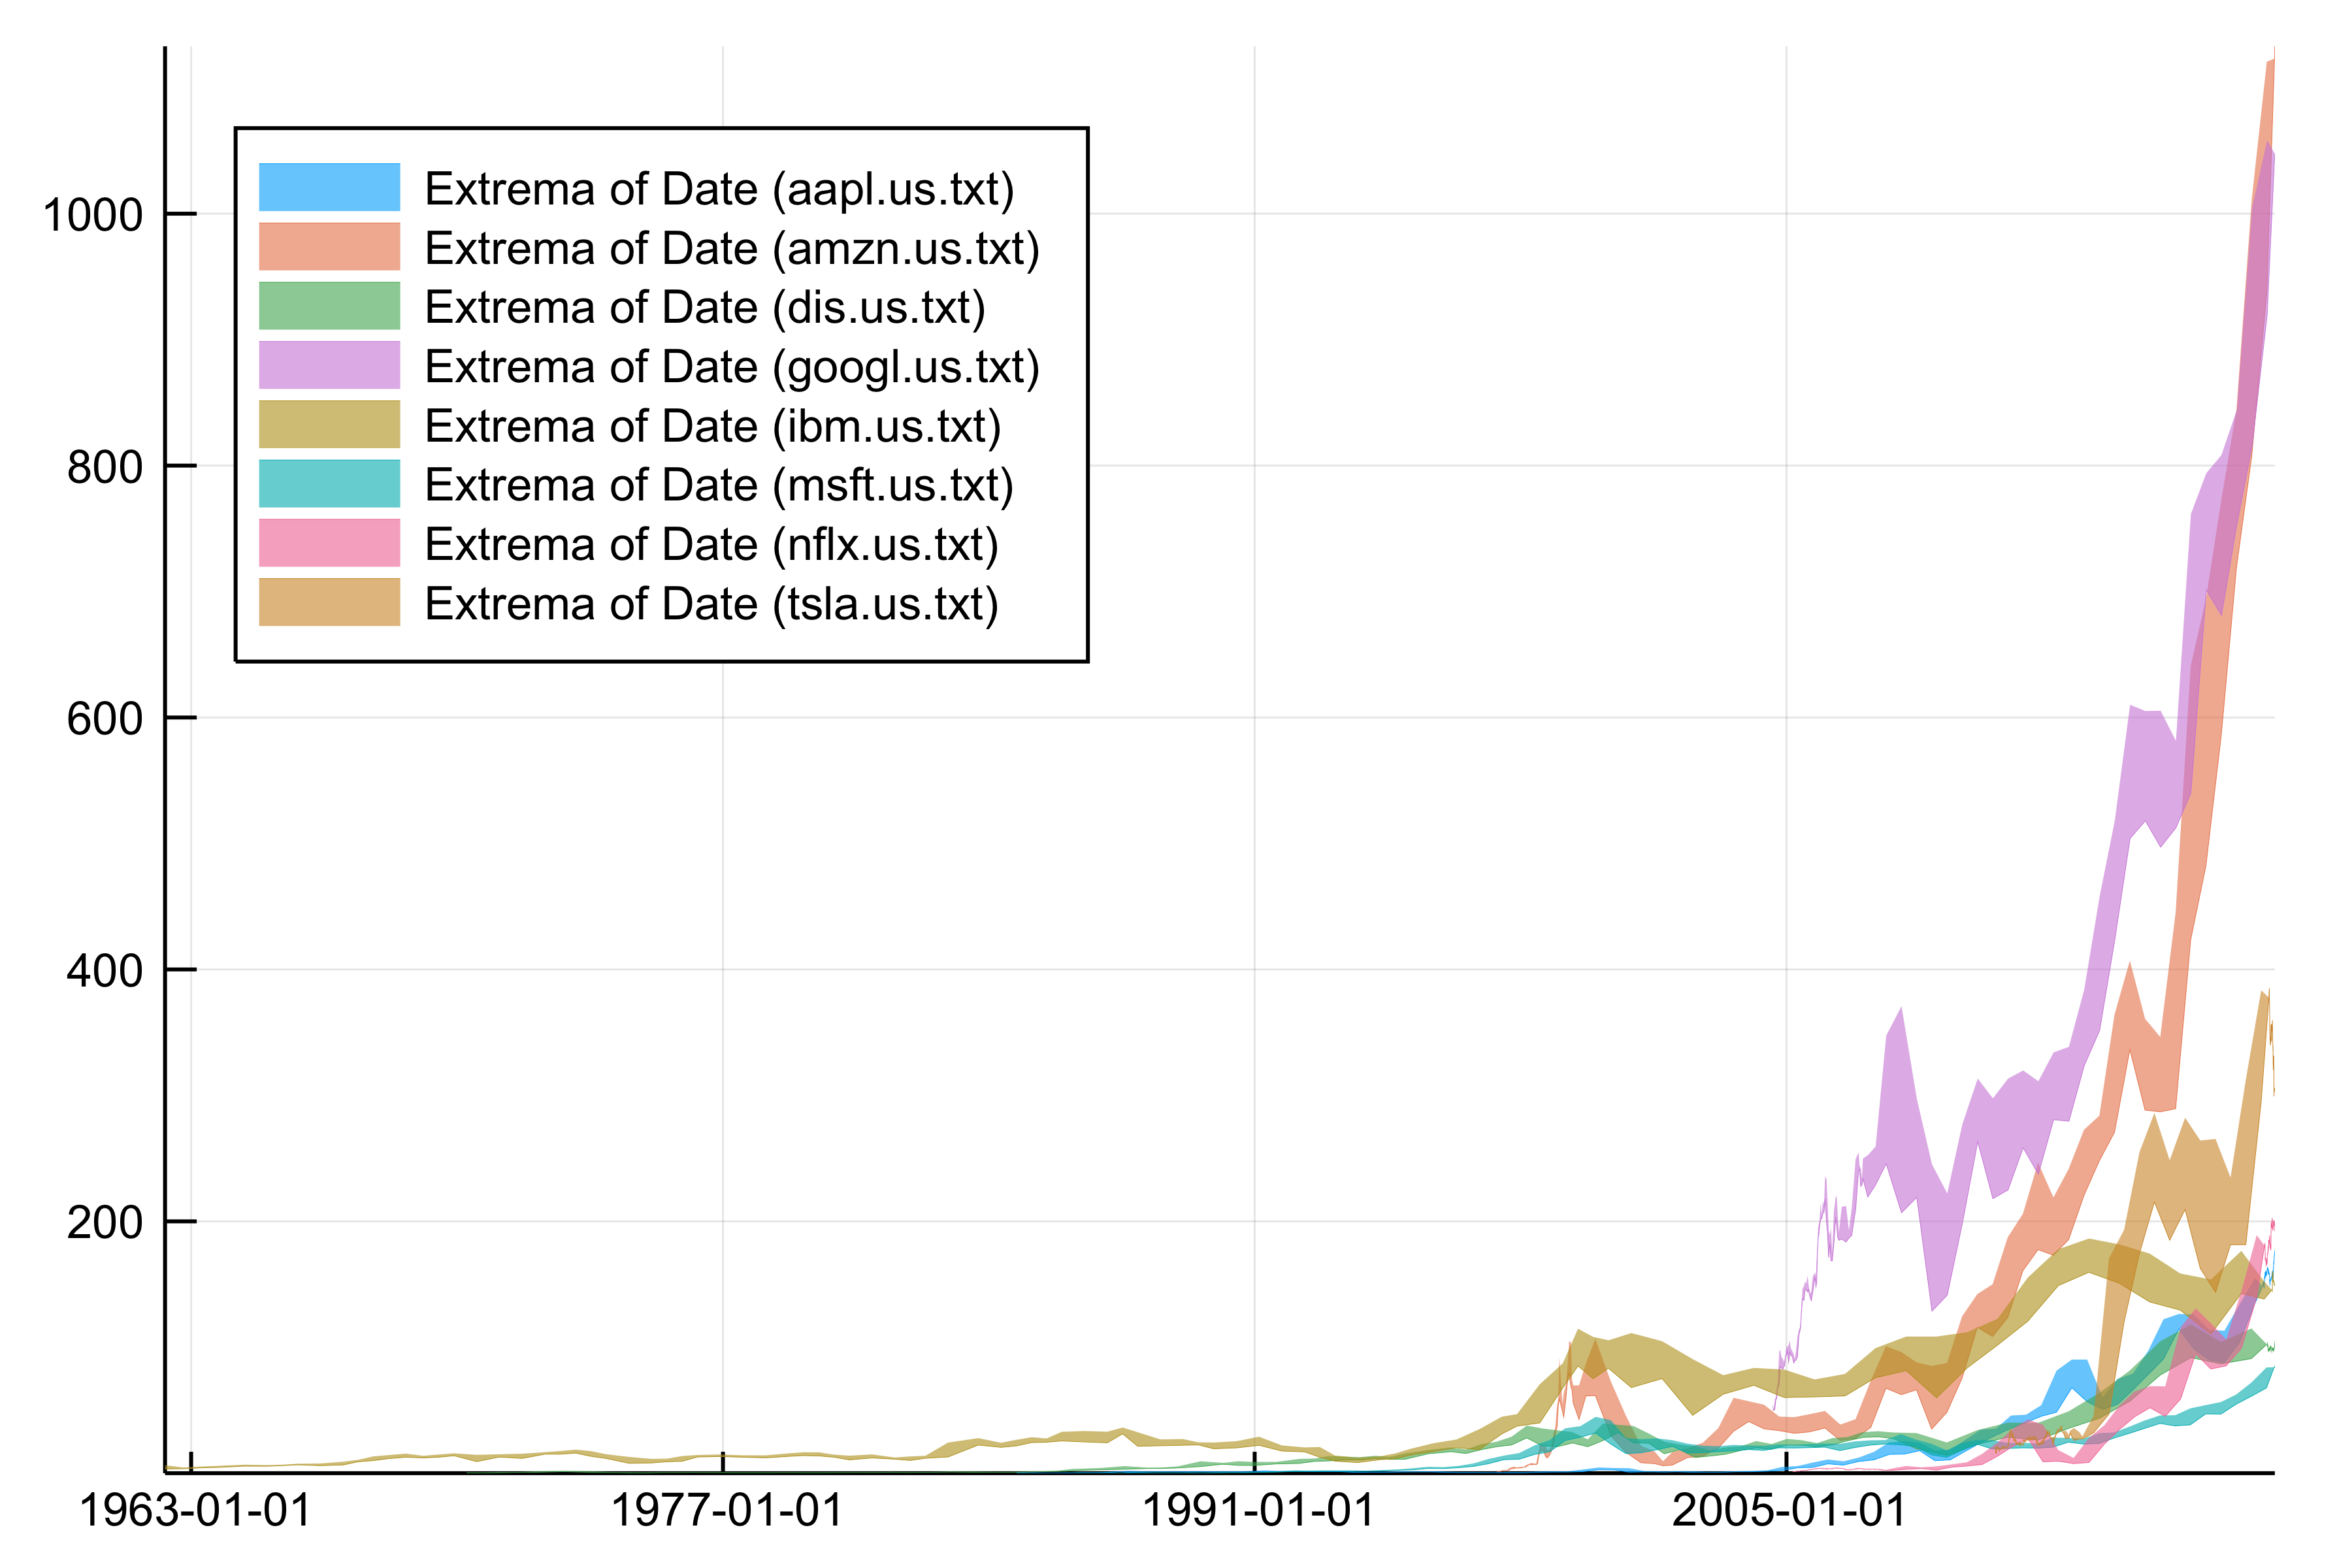

In [10]:
partitionplot(dt, :Date, :Close; by = :Ticker, legend=:topleft)